## 1.获取数据

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv(r'data\distance.csv')
data.head()

,Unnamed: 0,A0,A1,A2,A3,x,y,z,label
0,0,1016.931217,4782.857143,4552.962963,6298.994709,50,50,88,1
1,1,1338.424658,4920.136986,4109.178082,5943.561644,50,100,88,1
2,2,1783.790850,5033.464052,3605.882353,5619.150327,50,150,88,1
3,3,2253.617021,5218.563830,3085.159574,5322.819149,50,200,88,1
4,4,2727.142857,5370.285714,2600.142857,5033.238095,50,250,88,1


## 2. 基本数据处理

### 画出每列的缺失值的条形图

In [2]:

missing = data.isnull().sum()
missing
# missing = missing[missing > 0]
# missing.sort_values(inplace=True)
# missing.plot.bar()

Unnamed: 0    0
A0            0
A1            0
A2            0
A3            0
x             0
y             0
z             0
label         0
dtype: int64

### 单变量分析

In [3]:
data['label'].describe()

count    648.000000
mean       0.500000
std        0.500386
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: label, dtype: float64

D:\Users\JackYang\anaconda3\envs\dataAna\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label', ylabel='Density'>

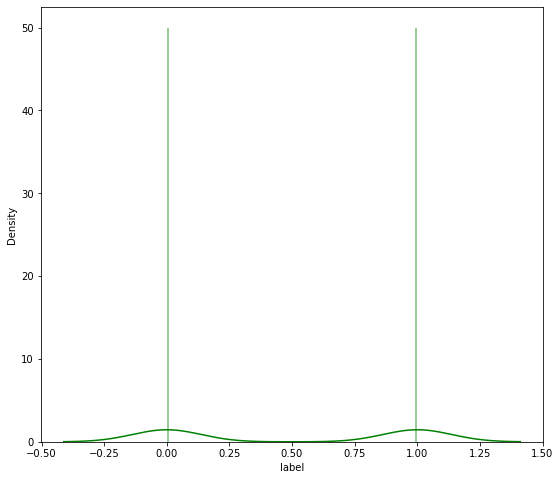

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 8))
sns.distplot(data['label'], color='g', bins=100, hist_kws={'alpha':0.4})


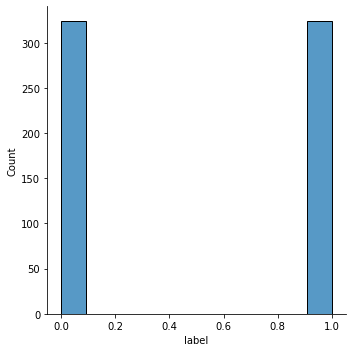

In [5]:
sns.displot(data=data, x='label')

### 相似性矩阵

<AxesSubplot:>

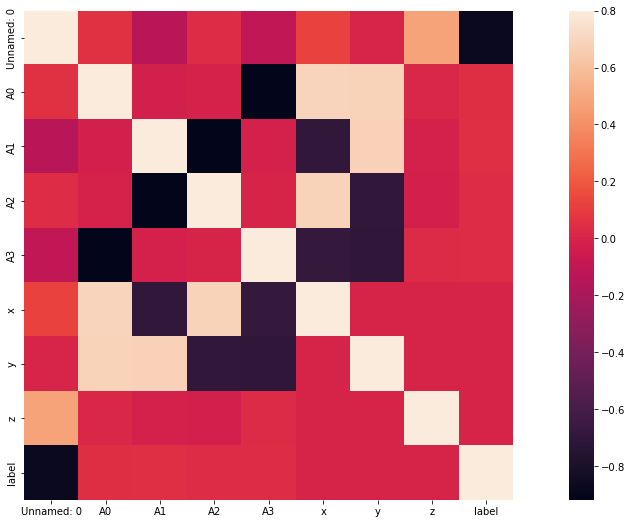

In [6]:
corrmat = data.corr()
f, ax = plt.subplots(figsize = (20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [7]:
data.head()

,Unnamed: 0,A0,A1,A2,A3,x,y,z,label
0,0,1016.931217,4782.857143,4552.962963,6298.994709,50,50,88,1
1,1,1338.424658,4920.136986,4109.178082,5943.561644,50,100,88,1
2,2,1783.790850,5033.464052,3605.882353,5619.150327,50,150,88,1
3,3,2253.617021,5218.563830,3085.159574,5322.819149,50,200,88,1
4,4,2727.142857,5370.285714,2600.142857,5033.238095,50,250,88,1


In [8]:
# 2.1 缺失值处理
data = data.replace(to_replace="?", value=np.NaN) # 把data中的 to_replece 值 替换为 value.
data = data.dropna()        # 删除有空值的行，默认 axis=0      
data.head()

,Unnamed: 0,A0,A1,A2,A3,x,y,z,label
0,0,1016.931217,4782.857143,4552.962963,6298.994709,50,50,88,1
1,1,1338.424658,4920.136986,4109.178082,5943.561644,50,100,88,1
2,2,1783.790850,5033.464052,3605.882353,5619.150327,50,150,88,1
3,3,2253.617021,5218.563830,3085.159574,5322.819149,50,200,88,1
4,4,2727.142857,5370.285714,2600.142857,5033.238095,50,250,88,1


## 3.确定特征值,目标值

In [9]:
data.columns    # 所有的列名

Index(['Unnamed: 0', 'A0', 'A1', 'A2', 'A3', 'x', 'y', 'z', 'label'], dtype='object')

In [10]:
x = data.iloc[:, 1:8]
x.head()
y = data["label"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
x.head()

,A0,A1,A2,A3,x,y,z
0,1016.931217,4782.857143,4552.962963,6298.994709,50,50,88
1,1338.424658,4920.136986,4109.178082,5943.561644,50,100,88
2,1783.790850,5033.464052,3605.882353,5619.150327,50,150,88
3,2253.617021,5218.563830,3085.159574,5322.819149,50,200,88
4,2727.142857,5370.285714,2600.142857,5033.238095,50,250,88


In [12]:
x.shape[0]*0.75

486.0

## 4.分割数据

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=22) # 训练集和测试集按照 0.75 : 0.25 (随机)
X_train

,A0,A1,A2,A3,x,y,z
327,2008.590604,4974.228188,3085.503356,5323.355705,50,200,88
56,3933.161290,2261.741935,5203.161290,3848.516129,350,150,88
242,6546.121495,4638.738318,4462.803738,869.252336,450,450,170
5,3212.800000,5665.200000,2149.911111,4832.577778,50,300,88
449,5138.976378,5117.716535,2554.251969,2446.771654,250,450,130
...,...,...,...,...,...,...,...
491,2979.007092,5374.609929,1948.226950,4928.297872,50,300,170
502,1375.707317,4091.414634,4167.268293,5628.926829,100,100,170
358,2200.423729,3178.559322,4556.694915,4955.677966,200,100,88
356,2788.269231,3631.730769,3693.750000,4229.326923,200,200,88


In [14]:
X_test

,A0,A1,A2,A3,x,y,z
623,3972.727273,1984.696970,4976.515152,3870.606061,350,150,200
389,5275.652174,3712.347826,4345.391304,1755.826087,400,350,88
551,5392.123288,3570.547945,4206.027397,1779.041096,400,350,170
617,3764.841270,2768.015873,4231.746032,3608.730159,300,200,200
130,3814.528302,3394.528302,4132.688679,3104.292453,300,250,130
...,...,...,...,...,...,...,...
568,1230.847458,4624.237288,4086.355932,6122.796610,50,100,200
427,2925.477707,4296.496815,2860.254777,4245.350318,150,250,130
485,6266.831683,4565.544554,4475.346535,568.910891,450,450,130
116,1969.612403,3129.302326,4966.899225,5711.046512,200,50,130


In [15]:
y_train

327    0
56     1
242    1
5      1
449    0
      ..
491    0
502    0
358    0
356    0
132    1
Name: label, Length: 486, dtype: int64

In [16]:
y_test

623    0
389    0
551    0
617    0
130    1
      ..
568    0
427    0
485    0
116    1
148    1
Name: label, Length: 162, dtype: int64

## 5.特征工程(标准化)

In [17]:
transfer = StandardScaler()                     #  实例化对象
X_train = transfer.fit_transform(X_train)       # 标准化
X_test = transfer.fit_transform(X_test)

In [18]:
X_train

array([[-1.43796501,  0.86810151, -0.54520456, ..., -1.55143148,
        -0.39370337, -1.39230246],
       [ 0.05371734, -1.15687309,  1.03849334, ...,  0.73802915,
        -0.77946917, -1.39230246],
       [ 2.07895166,  0.61764551,  0.48481435, ...,  1.50118269,
         1.53512564,  0.55690142],
       ...,
       [-1.28928037, -0.47243389,  0.55503119, ..., -0.40670117,
        -1.16523498, -1.39230246],
       [-0.83365733, -0.13412409, -0.09032518, ..., -0.40670117,
        -0.39370337, -1.39230246],
       [-0.4273051 , -1.03258542,  0.9046769 , ...,  0.35645237,
        -0.77946917, -0.39392974]])

In [19]:
X_test

array([[ 0.20623287, -1.62114508,  1.00301367, ...,  0.89636437,
        -0.76011455,  1.22013336],
       [ 1.18389765, -0.15251848,  0.47513551, ...,  1.30426052,
         0.80852949, -1.42227529],
       [ 1.27129309, -0.2730585 ,  0.35857018, ...,  1.30426052,
         0.80852949,  0.51234533],
       ...,
       [ 1.92764066,  0.57275967,  0.58383134, ...,  1.71215667,
         1.59285151, -0.43137205],
       [-1.29682755, -0.64814879,  0.99497082, ..., -0.32732407,
        -1.54443657, -0.43137205],
       [ 0.74174642, -1.10997832,  0.76310322, ...,  1.30426052,
         0.02420747, -0.43137205]])

## 6.机器学习(逻辑回归)

In [20]:
estimator = LogisticRegression()
estimator.fit(X_train, y_train)
estimator

LogisticRegression()

## 7.模型评估

In [21]:
y_predict = estimator.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [22]:
estimator.score(X_test, y_test)

0.5864197530864198

In [23]:
X_test

array([[ 0.20623287, -1.62114508,  1.00301367, ...,  0.89636437,
        -0.76011455,  1.22013336],
       [ 1.18389765, -0.15251848,  0.47513551, ...,  1.30426052,
         0.80852949, -1.42227529],
       [ 1.27129309, -0.2730585 ,  0.35857018, ...,  1.30426052,
         0.80852949,  0.51234533],
       ...,
       [ 1.92764066,  0.57275967,  0.58383134, ...,  1.71215667,
         1.59285151, -0.43137205],
       [-1.29682755, -0.64814879,  0.99497082, ..., -0.32732407,
        -1.54443657, -0.43137205],
       [ 0.74174642, -1.10997832,  0.76310322, ...,  1.30426052,
         0.02420747, -0.43137205]])

In [24]:
y_test

623    0
389    0
551    0
617    0
130    1
      ..
568    0
427    0
485    0
116    1
148    1
Name: label, Length: 162, dtype: int64

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(np.array(y_test), np.array(y_predict))
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(precision)
print(recall)
print(f1)

0.6049382716049383
0.5833333333333334
0.5939393939393939
